In [1]:
from graphics import * 
import pandas as pd 
import numpy as np 
from new_data_loader import bench, squat, deadlift
from data_loader import be, sq, de
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

interval = 100
k = 5
t = squat[0]['gravityX'].dropna().to_numpy()
bench.extend(be)
squat.extend(sq)
deadlift.extend(de)

bench = [e for e in bench if len(e['gravityX'].dropna().to_numpy()) > interval]
squat = [e for e in squat if len(e['gravityX'].dropna().to_numpy()) > interval]
deadlift = [e for e in deadlift if len(e['gravityX'].dropna().to_numpy()) > interval]

['novel', 'bench', '20', '5', 'bad-2024-10-25', '23-24-47.json']
['brian', 'bench', '35', '5', '-2024-10-25', '23-19-10.json']
['novel', 'squat', '20', '5', '-2024-10-25', '00-49-17.json']
['neal', 'bench', '0', '5', '-2024-10-25', '23-34-22.json']
['novel', 'squat', '20', '5', '-2024-10-25', '00-50-36.json']
['neal', 'deadlift', '25', '5', '-2024-10-25', '23-50-52.json']
['novel', 'deadlift', '35', '5', '-2024-10-25', '00-11-12.json']
['brian', 'deadlift', '60', '5', '-2024-10-25', '23-48-04.json']
['novel', 'deadlift', '35', '5', '-2024-10-25', '00-12-44.json']
['brian', 'bench', '45', '5', '-2024-10-25', '23-39-37.json']
['brian', 'squat', '35', '5', '-2024-10-25', '00-22-02.json']
['novel', 'deadlift', '25', '5', '-2024-10-25', '00-09-36.json']
['novel', 'deadlift', '40', '5', '-2024-10-25', '00-14-48.json']
['brian', 'deadlift', '35', '5', '-2024-10-25', '23-43-11.json']
['neal', 'bench', '10', '5', '-2024-10-25', '23-34-56.json']
['neal', 'squat', '15', '4', '-2024-10-25', '00-39

In [12]:
def normalize(sig):
    rms = np.sqrt(np.sum(sig * sig) / len(sig))
    return sig / rms


def normalize_2(sig):
    mean = np.mean(sig)
    std = np.std(sig)
    return (sig - mean)/std

In [21]:
s = bench[3]['gravityX'].dropna().to_numpy()

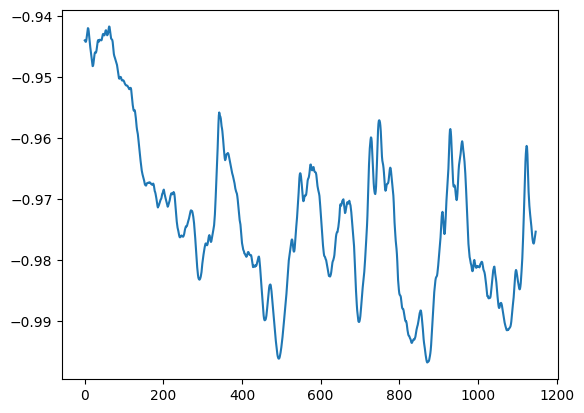

In [22]:
plt.plot(s)

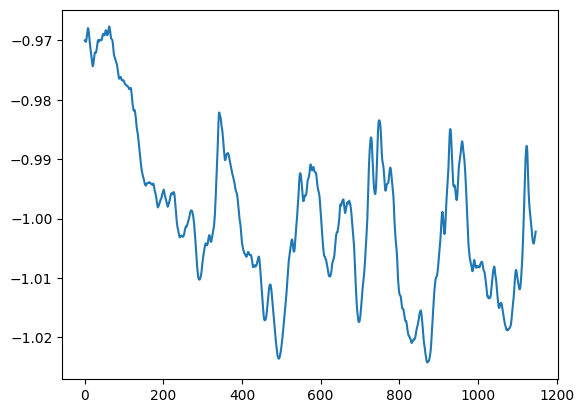

In [23]:
plt.plot(normalize(s))

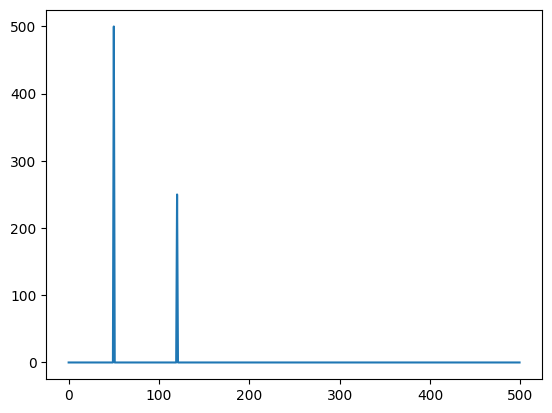

In [35]:
def fft(signal, fs):
    N = len(signal)  # Number of samples
    fft_result = np.fft.fft(signal)  # Compute FFT
    frequencies = np.fft.fftfreq(N, d=1/fs)  # Frequency axis
    magnitude_spectrum = np.abs(fft_result)  # Magnitude spectrum

    return frequencies[:N//2], magnitude_spectrum[:N//2]


fs = 1000
t = np.linspace(0, 1, fs, endpoint=False) 
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

freqs, spectrum = compute_fft(signal, fs)

plt.plot(freqs, spectrum)


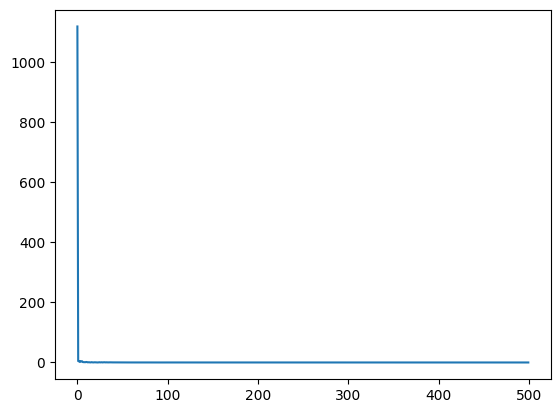

In [44]:
s = bench[3]['gravityX'].dropna().to_numpy()
norm_s = normalize(s)
x, y = fft(s, 1000)
plt.plot(x, y)